In [12]:
#从sklearn中导入数据集
#导入绘图工具
#导入数学计算的math包
#导入有关数组计算的numpy包
#导入预处理的preprocessing包
from sklearn import datasets
import math
import numpy as np
import networkx as nx
from numpy import *
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [21]:
#加载鸢尾花数据集，并且只取前两个特征：花萼的长度和花萼的宽度
iris = datasets.load_iris()
X = np.array(iris.data)
y =  np.array(iris.target)
x1 = X[:,0]
x2 = X[:,1]

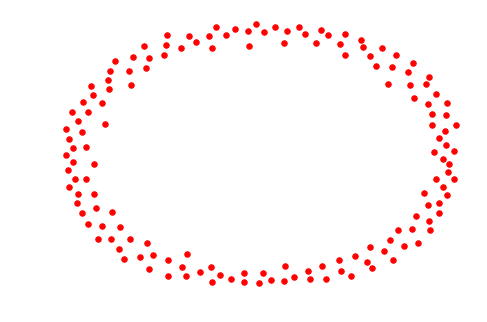

In [35]:
nodes1 = {}
nodes2 = {}
nodes3 = {}
for i in range(50):
    nodes1[i] = X[i]
for j in range(50,100):
    nodes2[j] = X[j]
for m in range(100,150):
    nodes3[m] = X[m]
G = nx.Graph()
G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)
G.add_nodes_from(nodes3)
nx.draw(G,node_size=30,node_color='red',width=0.5,edge_color='grey')

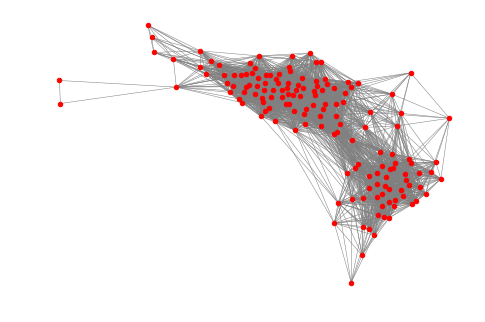

In [43]:
#用高斯核函数作为相似度度量的依据
A = np.array([])
a = 1/np.sqrt(2)

for i in np.arange(0,150):
    for j in np.arange(0,150):
        A = np.append(A,np.exp(-(pow(x1[i]-x1[j],2)+pow(x2[i]-x2[j],2))/(2*pow(a,2))))

A = A.reshape(150,150)

#阈值
edges= []
for i in np.arange(0,150):
    for j in np.arange(i,150):
        if A[i,j] >0.655:
            A[i,j]=1
            edges.append((i,j))
        else:
            A[i,j]=0
G.add_edges_from(edges)
nx.draw(G,node_size=20,node_color='red',width=0.5,edge_color='grey')

In [44]:
W = np.zeros_like(A)
if(i,j) in edges:
    W[i,j] = 1
else:
    W[i,j] = 0
#度数矩阵
def getD(A):
    p_num = len(A)
    D = np.diag(np.zeros(p_num))
    for i in range(p_num):
        D[i][i] = sum(A[i])
    return D
D = getD(A)
D

array([[42.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 38.74826357,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 33.70191713, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 69.36806999,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        65.98999447,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 79.06224069]])

In [45]:
#拉普拉斯矩阵
def getL(D,W):
    row = W.shape[0]
    col = W.shape[1]
    L = np.zeros_like(D)
    for i in range(row):
        for j in range(col):
            L[i][j] = D[i][j] - W[i][j]
    return L
L = getL(D,A)
laplace = preprocessing.StandardScaler().fit_transform(L)

In [46]:
from scipy.sparse.linalg import arpack
#得到特征值特征向量
cluster_num = 150
eigval,eigvec = arpack.eigs(laplace, k=cluster_num,tol=0,which="LM") 
eigvec

F:\Anaconda\envs\python35\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1254: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


array([[-6.59569492e-02+0.j, -1.15559434e-01+0.j, -2.73894611e-02+0.j,
        ..., -2.64189223e-01+0.j, -3.52445862e-01+0.j,
         5.76173188e-10+0.j],
       [-6.08052098e-02+0.j, -1.00958240e-01+0.j,  2.99673485e-03+0.j,
        ...,  1.53455675e-01+0.j, -4.35516831e-01+0.j,
         5.45968695e-10+0.j],
       [-5.28092936e-02+0.j, -9.24398940e-02+0.j, -1.96208324e-02+0.j,
        ...,  2.83248121e-01+0.j,  1.58563756e-01+0.j,
        -1.38884756e-09+0.j],
       ...,
       [-1.09392765e-01+0.j,  1.06853254e-01+0.j, -6.13630341e-02+0.j,
        ...,  4.84689201e-03+0.j, -1.35435694e-02+0.j,
        -1.21881573e-11+0.j],
       [-1.03850330e-01+0.j,  5.13246484e-02+0.j, -2.53589314e-02+0.j,
        ..., -1.98241183e-04+0.j, -3.50829266e-04+0.j,
        -1.37330360e-11+0.j],
       [-1.24795349e-01+0.j,  1.43742699e-02+0.j,  5.77310956e-02+0.j,
        ..., -2.32262302e-03+0.j,  2.74099001e-03+0.j,
        -7.29825352e-12+0.j]])

In [49]:
# 用argsort函数对特征值进行从小到大排列，并获取其索引值
indices = np.argsort(eigval)
#选取前k个特征值对应的特征向量组成矩阵

#numpy数组的索引除了指定第一维外，还可以指定特定的列数，上面的evecs[ : , …]逗号后面省略的部分就是指定对应要保留的特征向量的列号（特征向量按列存放）。

#sorted_indices[:-k-1:-1]则利用切片的语法特性，保留了前K大的特征值对应的下标。切片有三个参数[start : end : step]，当step为-1时，表示逆序，从最后一个元素开始，一直到第end+1个元素为止。sorted_indices[:-k-1:-1]则表示从最后一个元素一直到第k个为止的所有下标，也就是前k大的特征值对应的下标。
topk_evecs = eigvec[:,indices[:-8:1]]
Y = np.array(topk_evecs)
kmeans = KMeans(n_clusters=3)#构造聚类器
kmeans.fit(Y)#聚类
label_pred = kmeans.labels_ #获取聚类标签
label_pred

F:\Anaconda\envs\python35\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


array([0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(label_pred,y)

0.31333333333333335